In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv('empattrition.csv')

pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [156]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns


Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

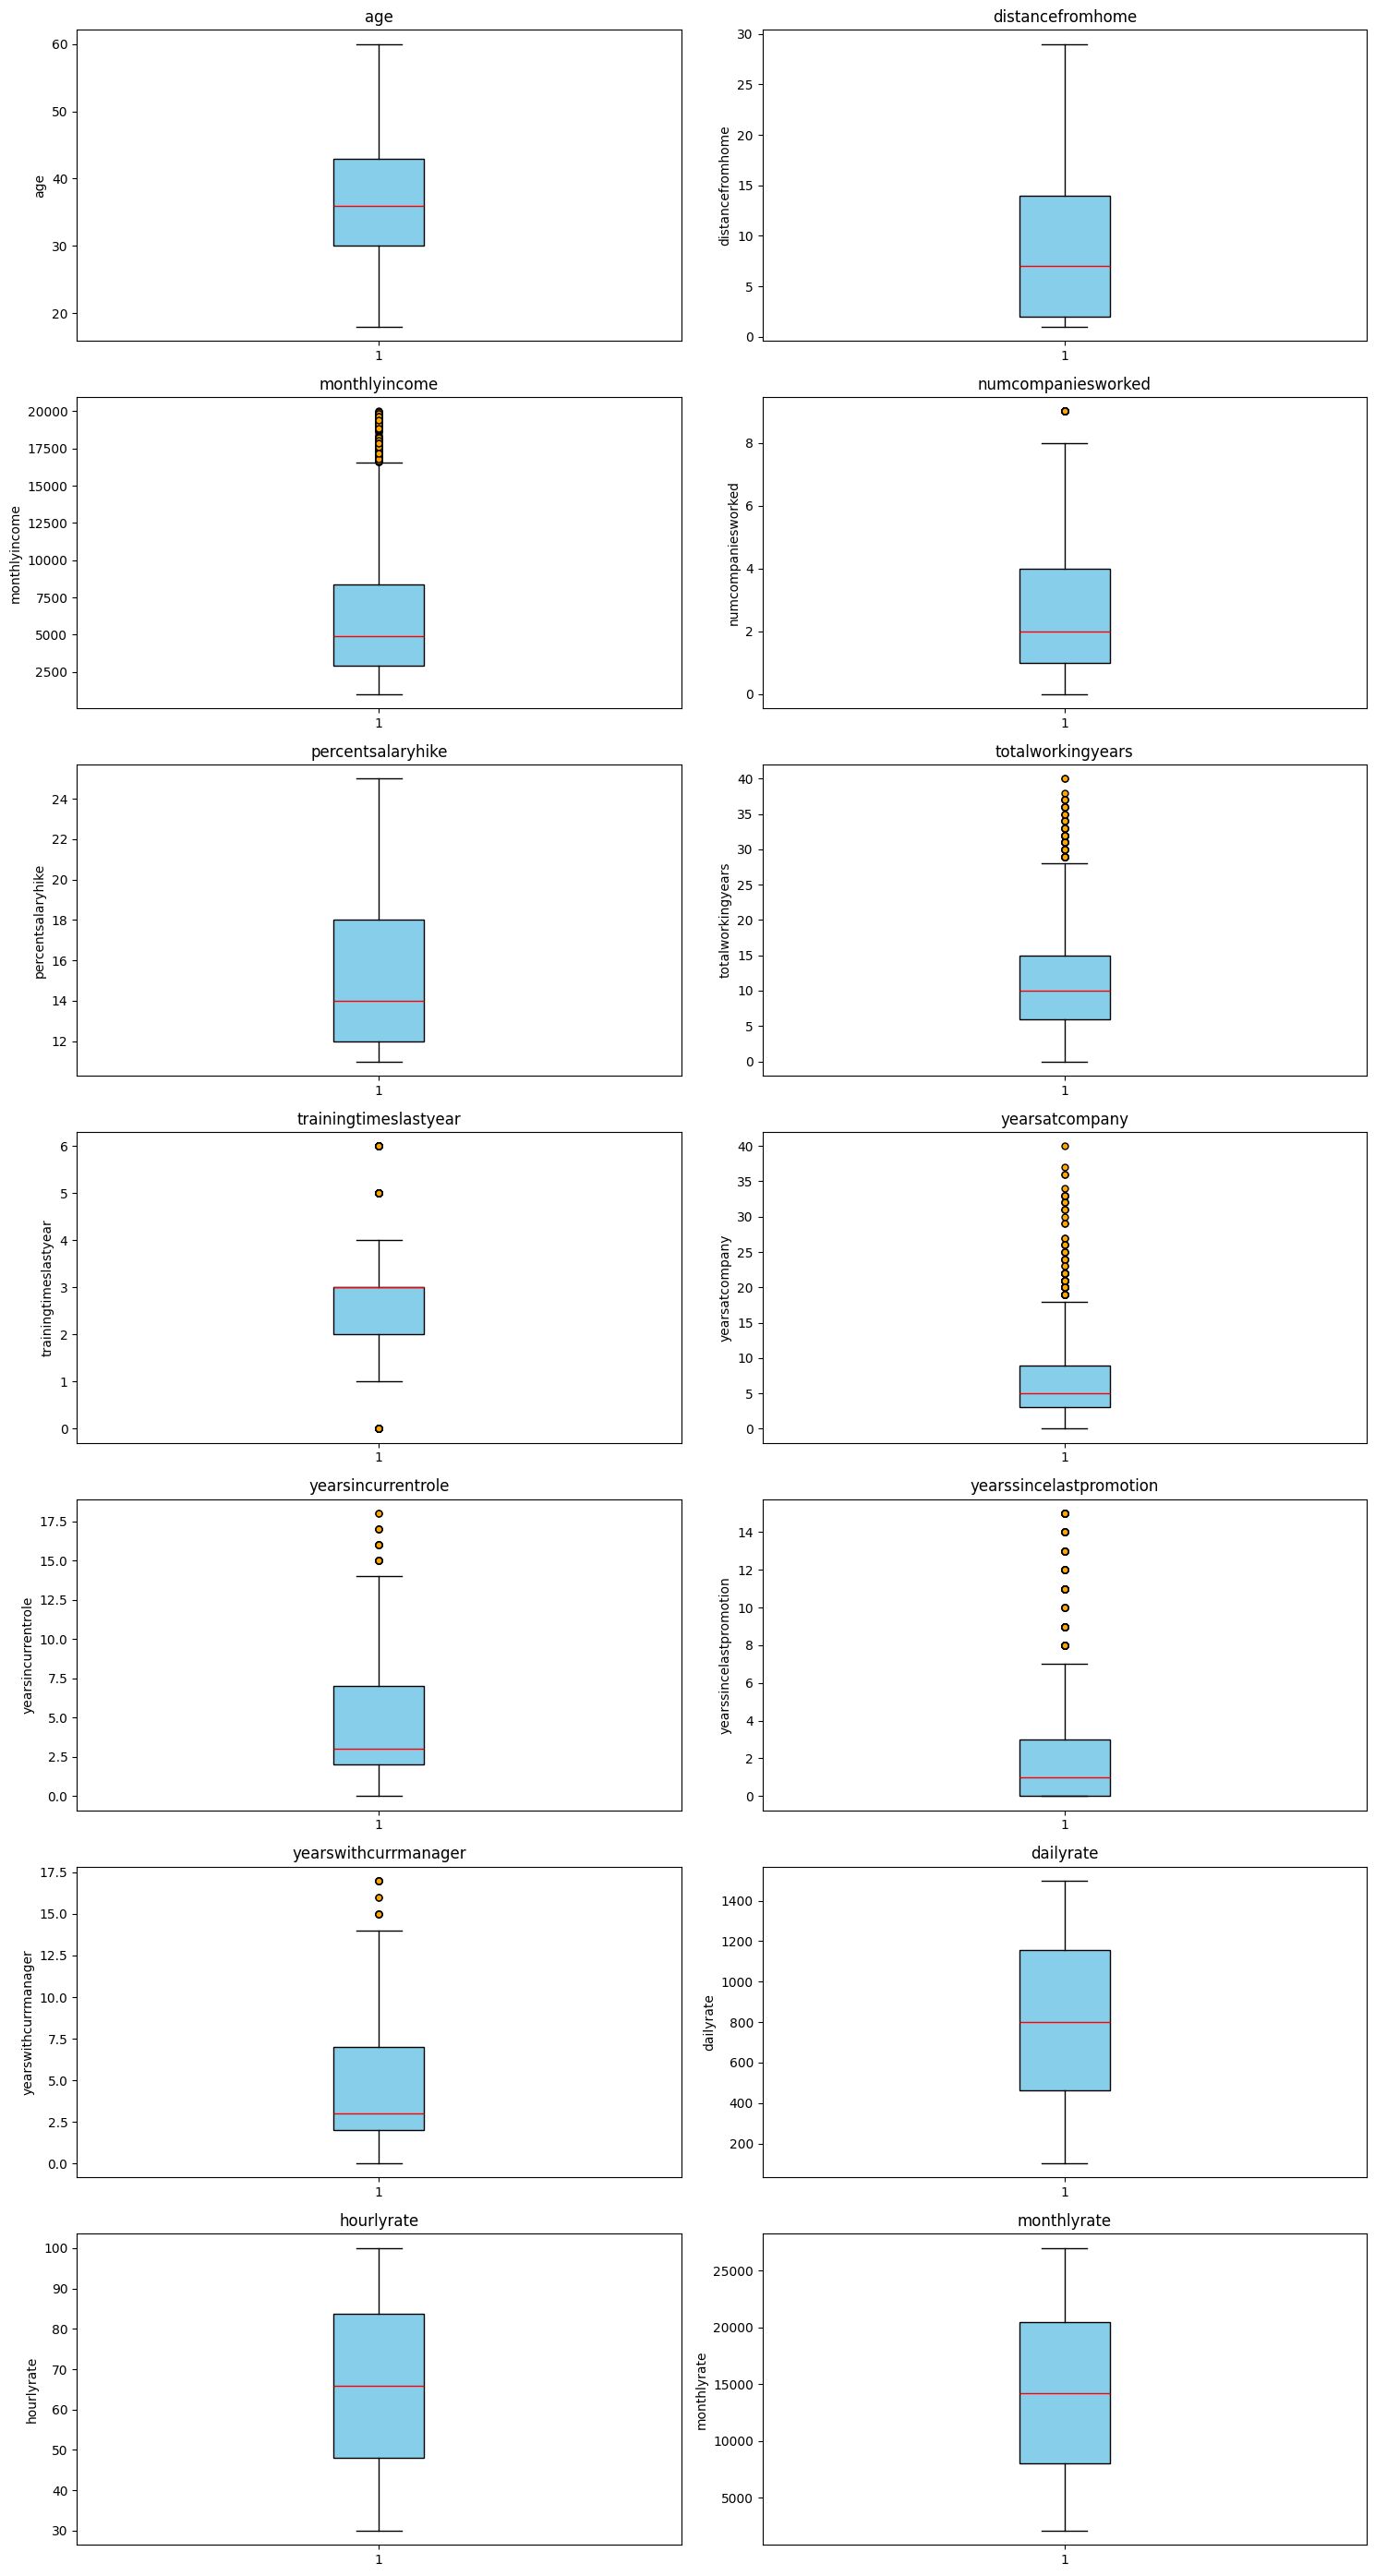

In [157]:
import matplotlib.pyplot as plt

# Define numerical columns for outlier detection
outlier_columns = [
    'age', 'distancefromhome', 'monthlyincome', 'numcompaniesworked',
    'percentsalaryhike', 'totalworkingyears', 'trainingtimeslastyear',
    'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
    'yearswithcurrmanager', 'dailyrate', 'hourlyrate', 'monthlyrate'
]

# Number of plots per row
plots_per_row = 2
total_plots = len(outlier_columns)
rows = (total_plots + plots_per_row - 1) // plots_per_row

# Set figure size
plt.figure(figsize=(15, rows * 4))

# Plot boxplots
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(rows, plots_per_row, i)
    plt.boxplot(df[col].dropna(), patch_artist=True,
                boxprops=dict(facecolor='skyblue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()



In [158]:
# List of features with high outliers based on your analysis
features_to_cap = [
    'monthlyincome',
    'numcompaniesworked',
    'totalworkingyears',
    'trainingtimeslastyear',
    'yearsatcompany',
    'yearsincurrentrole',
    'yearssincelastpromotion',
    'yearswithcurrmanager'
]

def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values outside the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping only to specified features
for feature in features_to_cap:
    if feature in df.columns:
        print(f"Capping outliers in: {feature}")
        df = cap_outliers_iqr(df, feature)
    else:
        print(f"Feature '{feature}' not found in DataFrame.")

Capping outliers in: monthlyincome
Capping outliers in: numcompaniesworked
Capping outliers in: totalworkingyears
Capping outliers in: trainingtimeslastyear
Capping outliers in: yearsatcompany
Capping outliers in: yearsincurrentrole
Capping outliers in: yearssincelastpromotion
Capping outliers in: yearswithcurrmanager


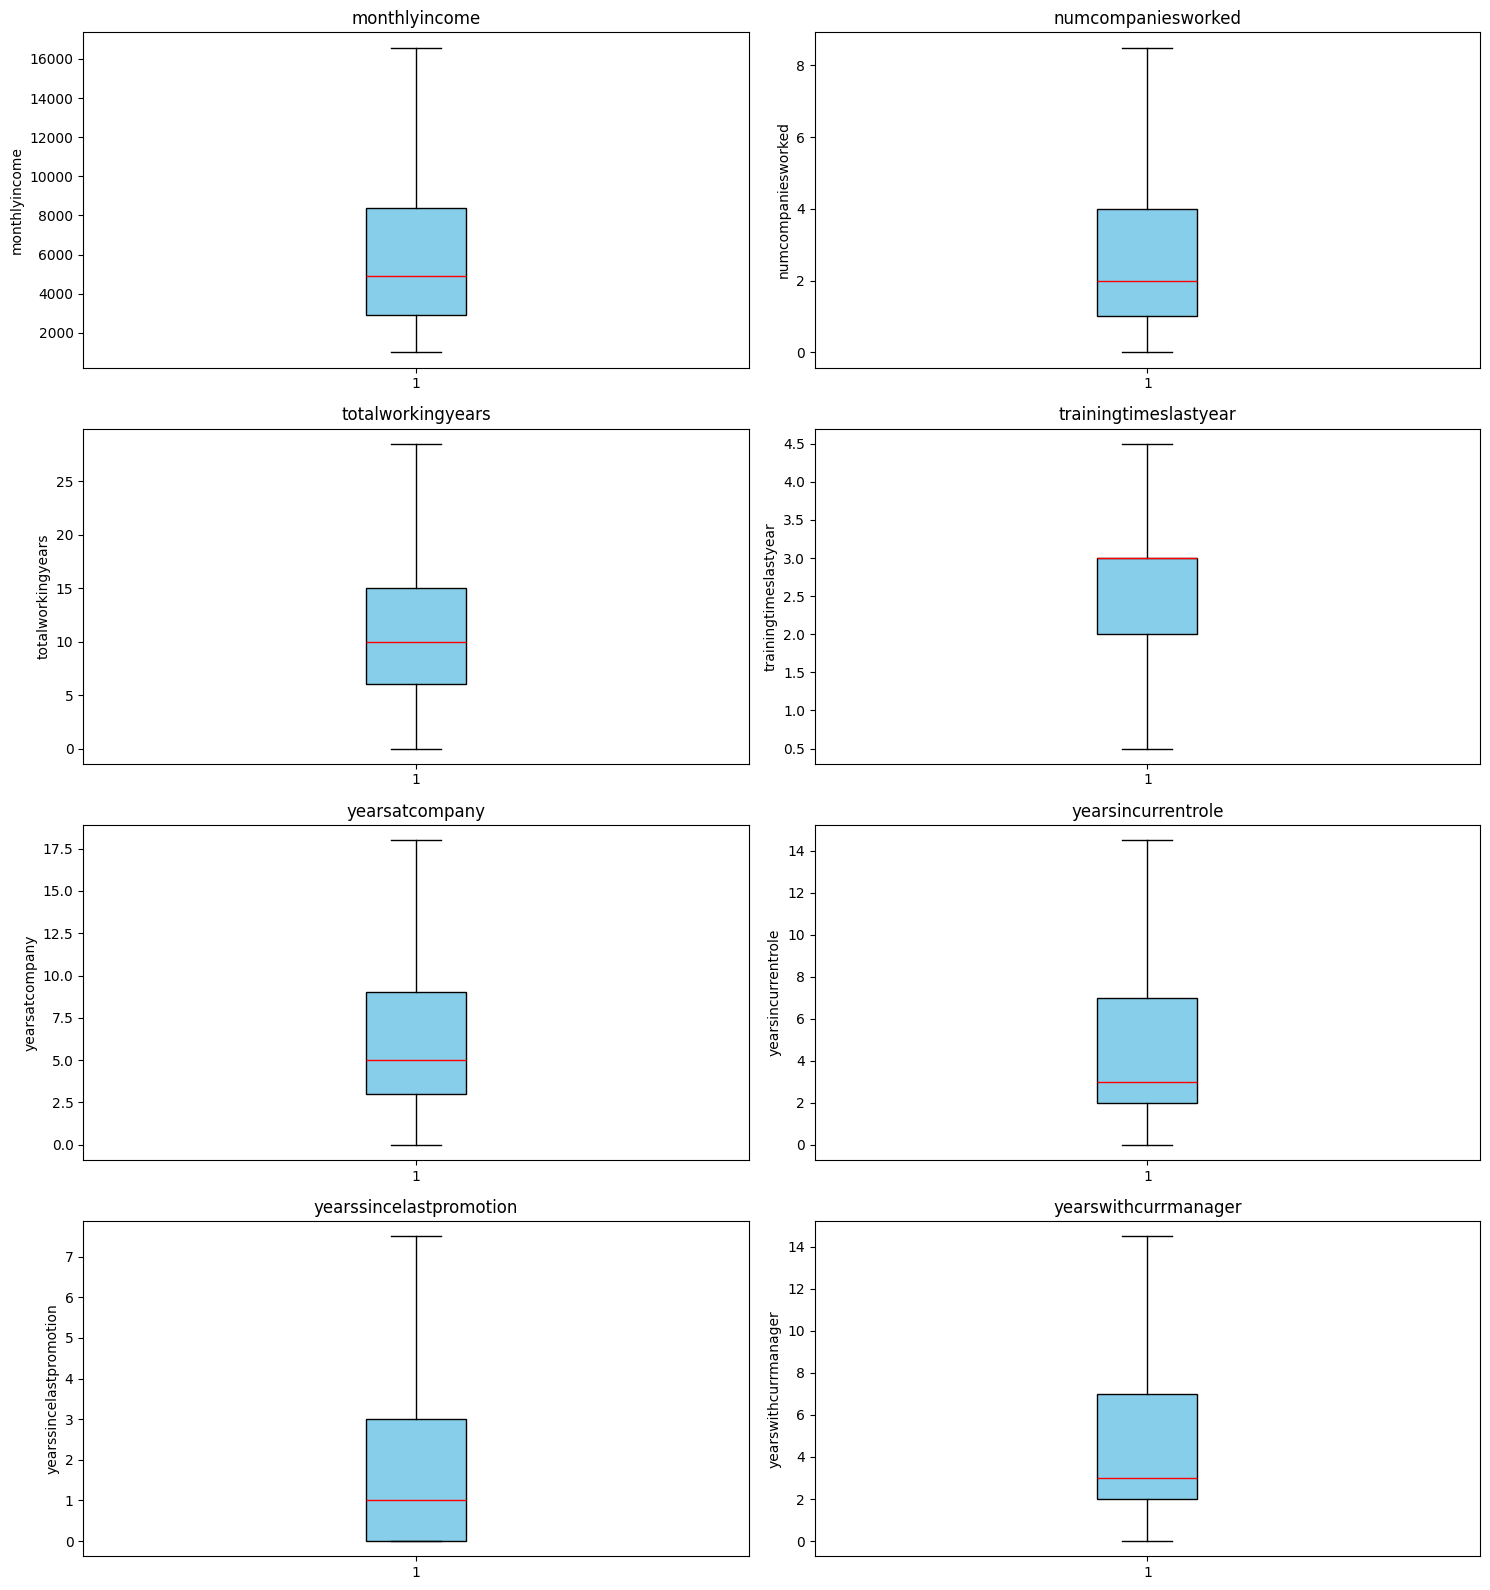

In [159]:


# Define numerical columns for outlier detection
outlier_columns = [
    'monthlyincome', 'numcompaniesworked','totalworkingyears', 'trainingtimeslastyear',
    'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager'
]

# Number of plots per row
plots_per_row = 2
total_plots = len(outlier_columns)
rows = (total_plots + plots_per_row - 1) // plots_per_row

# Set figure size
plt.figure(figsize=(15, rows * 4))

# Plot boxplots
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(rows, plots_per_row, i)
    plt.boxplot(df[col].dropna(), patch_artist=True,
                boxprops=dict(facecolor='skyblue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
    plt.title(col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Define your numerical columns
numeric_cols = ['age', 'distancefromhome', 'monthlyincome', 'numcompaniesworked', 'percentsalaryhike',
                'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
                'yearssincelastpromotion', 'yearswithcurrmanager', 'dailyrate', 'monthlyrate', 'hourlyrate']

# Apply StandardScaler 
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [162]:
# Separate features (X) and target (y)
x = df.drop('attrition', axis=1)
y = df['attrition']

In [163]:
print("Original class distribution:\n", y.value_counts())

Original class distribution:
 attrition
0    1233
1     237
Name: count, dtype: int64


In [164]:
# Apply SMOTE on entire dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [165]:
# Convert back to DataFrame/Series with correct columns
x_resampled = pd.DataFrame(x_resampled, columns=x.columns)
y_resampled = pd.Series(y_resampled, name='Attrition')

In [166]:
print("Shape of X before SMOTE:", x.shape)
print("Shape of X after SMOTE :", x_resampled.shape)

print("Shape of y before SMOTE:", y.shape)
print("Shape of y after SMOTE :", y_resampled.shape)


Shape of X before SMOTE: (1470, 31)
Shape of X after SMOTE : (2466, 31)
Shape of y before SMOTE: (1470,)
Shape of y after SMOTE : (2466,)


In [167]:
from sklearn.model_selection import train_test_split

# Split resampled data into training and testing sets (80% train, 20% test)
# Stratify - when you split into train/test, you still want to maintain the same ratio of classes (e.g., 50% No / 50% Yes in Attrition) in both splits.
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Check class distribution after split
print("Train target distribution:\n", y_train.value_counts())
print("\nTest target distribution:\n", y_test.value_counts())

Train target distribution:
 Attrition
1    986
0    986
Name: count, dtype: int64

Test target distribution:
 Attrition
1    247
0    247
Name: count, dtype: int64


In [168]:
print("Train feature distribution:\n", x_train.shape)
print("\nTest feature distribution:\n", x_test.shape) 

Train feature distribution:
 (1972, 31)

Test feature distribution:
 (494, 31)


In [169]:
combined_df = x_resampled.copy()
combined_df['Attrition'] = y_resampled
combined_df.to_csv('resampled_with_target.csv', index=False)

In [170]:
# Variable	        Description
#  x	              Original scaled features
#  y	              Original target (imbalanced)
#  x_resampled	      Scaled + SMOTE-balanced features (full set)
#  y_resampled	      Balanced target labels after SMOTE
#  x_train, x_test	  Train/test features from x_resampled
#  y_train, y_test	  Train/test targets from y_resampled

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

Classification Report - XGBoost:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       247
           1       0.92      0.89      0.91       247

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494

Accuracy Score: 0.9068825910931174


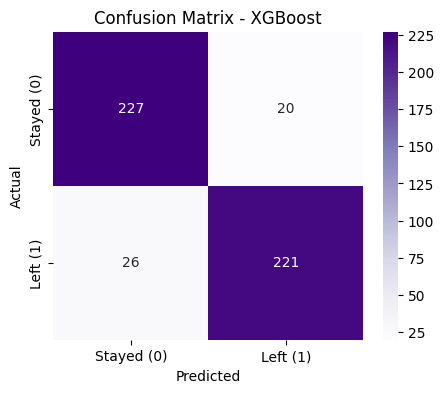

Cross-Validation Accuracy Scores: [0.9164557  0.90632911 0.92385787 0.93147208 0.89593909]
Mean CV Accuracy: 0.9148107691319154


In [172]:
# Initialize model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(x_test)

# Evaluation
print("Classification Report - XGBoost:\n")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Purples", xticklabels=['Stayed (0)', 'Left (1)'], yticklabels=['Stayed (0)', 'Left (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# 5-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores_xgb)
print("Mean CV Accuracy:", cv_scores_xgb.mean())


In [174]:
import os
import pickle

# Save the trained XGBoost model to file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("XGBoost model saved successfully")


XGBoost model saved successfully
